<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/ROC_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Receiver Operating characteristic curve(ROC), Area Under the Curve(AUC)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od 

url = 'https://www.kaggle.com/mathchi/diabetes-data-set'
od.download(url)

Skipping, found downloaded files in "./diabetes-data-set" (use force=True to force download)


In [4]:
diabete = pd.read_csv('./diabetes-data-set/diabetes.csv')
diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabete.shape

(768, 9)

In [6]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81f7a1c110>,
      dtype=object)

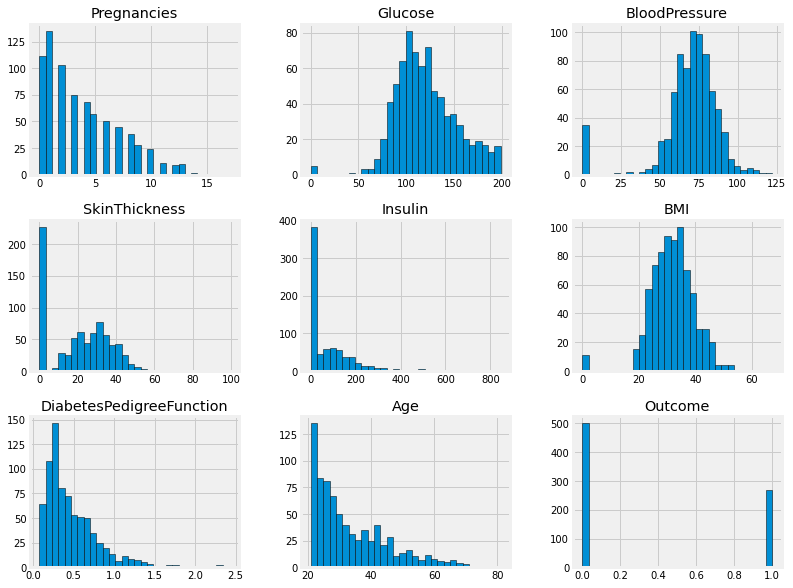

In [7]:
diabete.hist(figsize=(12, 10), bins=30, edgecolor="black")

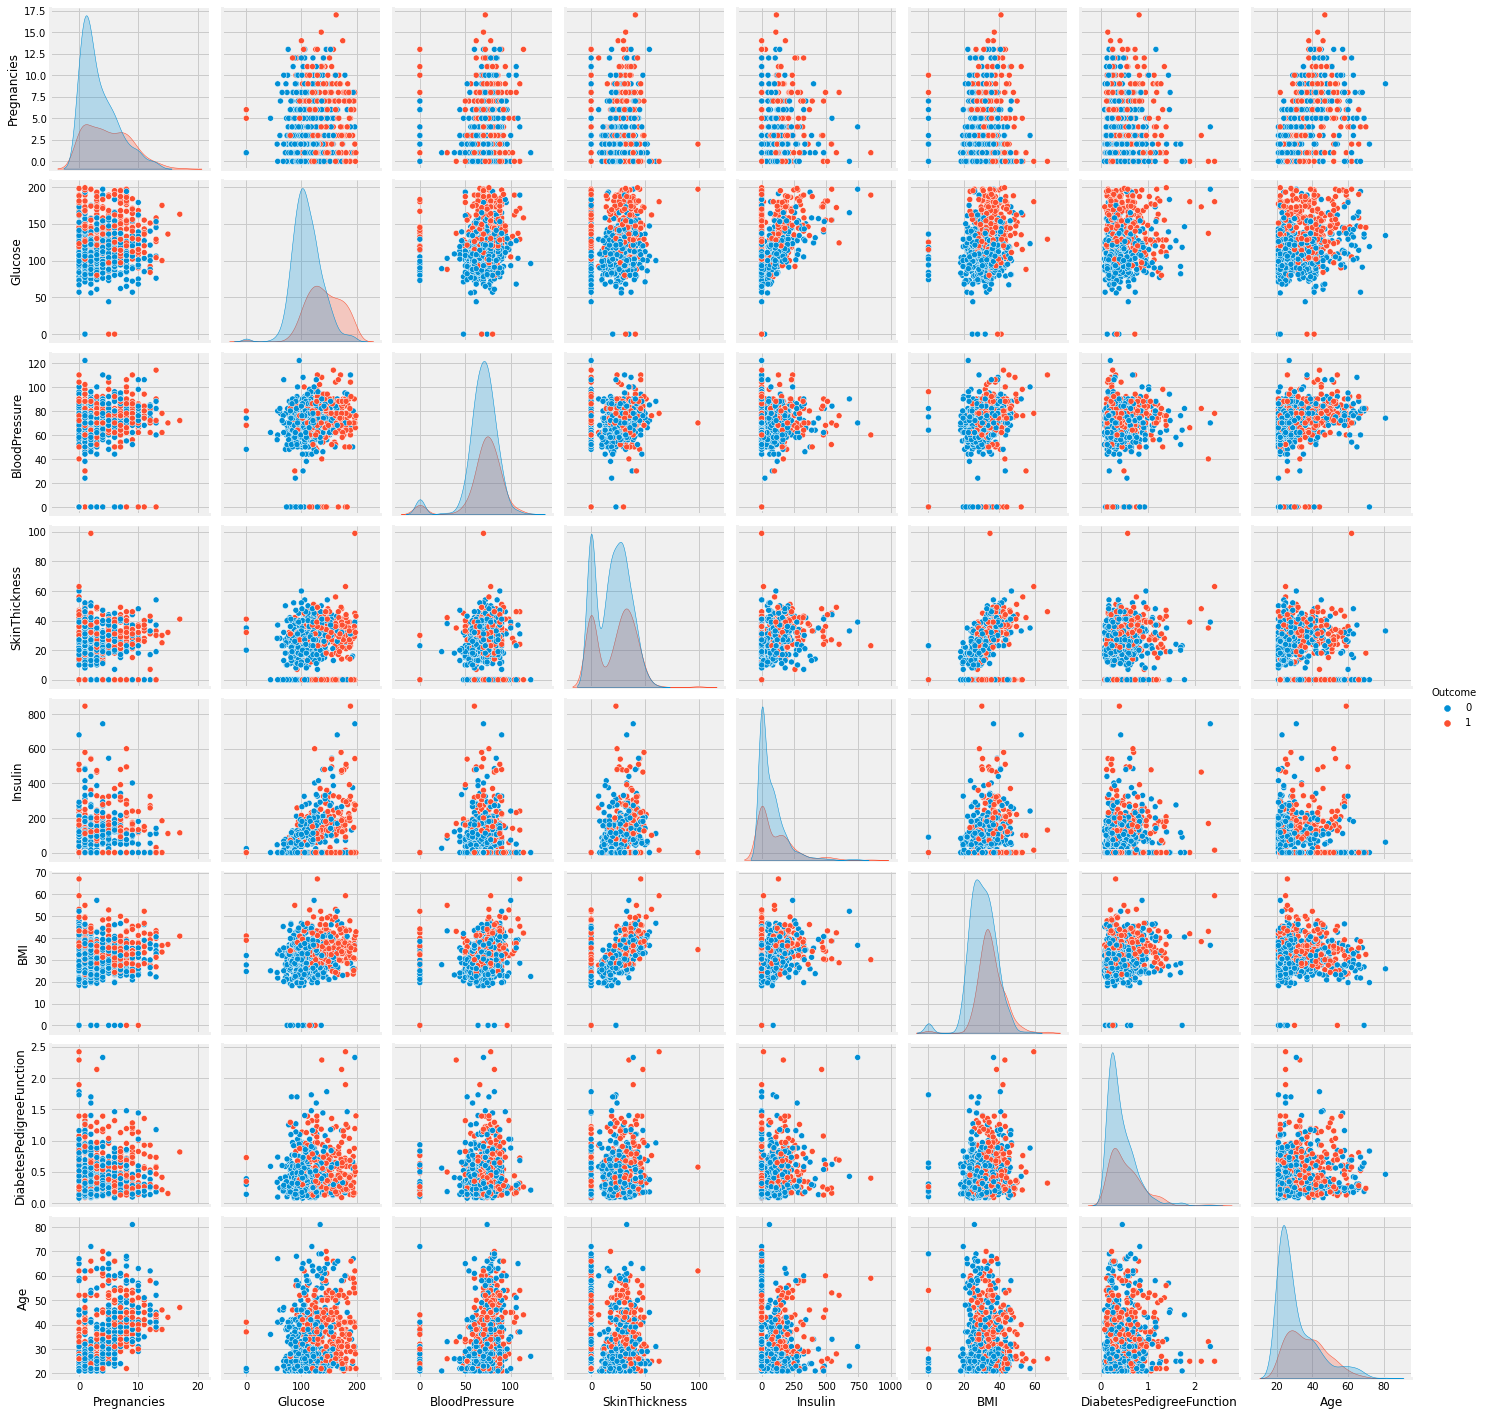

In [8]:
sns.pairplot(diabete, hue='Outcome')

In [11]:
data = diabete.drop('Outcome', axis=1)
target = diabete.Outcome

target.value_counts(normalize=True, dropna=False).round(3) * 100

0    65.1
1    34.9
Name: Outcome, dtype: float64

Imbalanced target

In [10]:
diabete.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Outcome')

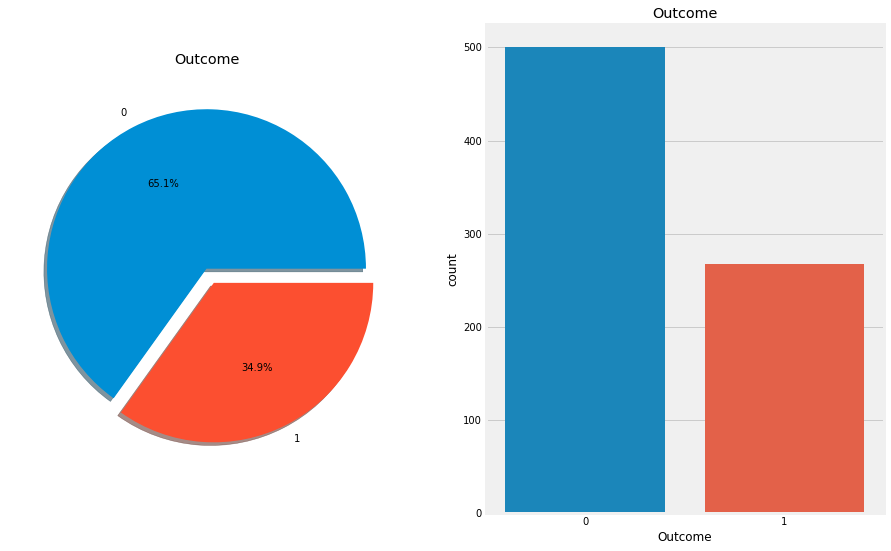

In [12]:
fig, ax = plt.subplots(1, 2, figsize=[14,9])
target.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome', data=diabete, ax=ax[1])
ax[1].set_title('Outcome')

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=.2, random_state=0,
                                                    stratify=target)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [15]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.651466
1    0.348534
Name: Outcome, dtype: float64
0    0.649351
1    0.350649
Name: Outcome, dtype: float64


Same distribution